In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

from sklearn.preprocessing import LabelEncoder

for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values) + list(test.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))
        test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))
        
# keep ID for submission
train_ID = train['Id']
test_ID = test['Id']

#split data for training
y_train = train['SalePrice']
X_train = train.drop(['Id', 'SalePrice','LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)
X_test = test.drop('Id',axis=1)

Xmat = pd.concat([X_train, X_test])
Xmat = Xmat.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis=1)
Xmat = Xmat.fillna(Xmat.median())

C:\Users\fujii\Anaconda3\envs\tesorflow-gpu\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [2]:
Xmat['TotalSF'] = Xmat['TotalBsmtSF'] + Xmat['1stFlrSF'] + Xmat['2ndFlrSF']

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,8450,1,2,3,3,0,4,0,...,0,0,3,4,4,0,2,2008,8,4
1,20,3,9600,1,2,3,3,0,2,0,...,0,0,3,4,4,0,5,2007,8,4
2,60,3,11250,1,2,0,3,0,4,0,...,0,0,3,4,4,0,9,2008,8,4
3,70,3,9550,1,2,0,3,0,0,0,...,0,0,3,4,4,0,2,2006,8,0
4,60,3,14260,1,2,0,3,0,2,0,...,0,0,3,4,4,0,12,2008,8,4


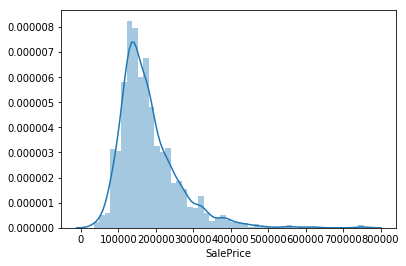

In [3]:
ax = sns.distplot(y_train)
X_train.head()

Training done using Random Forest


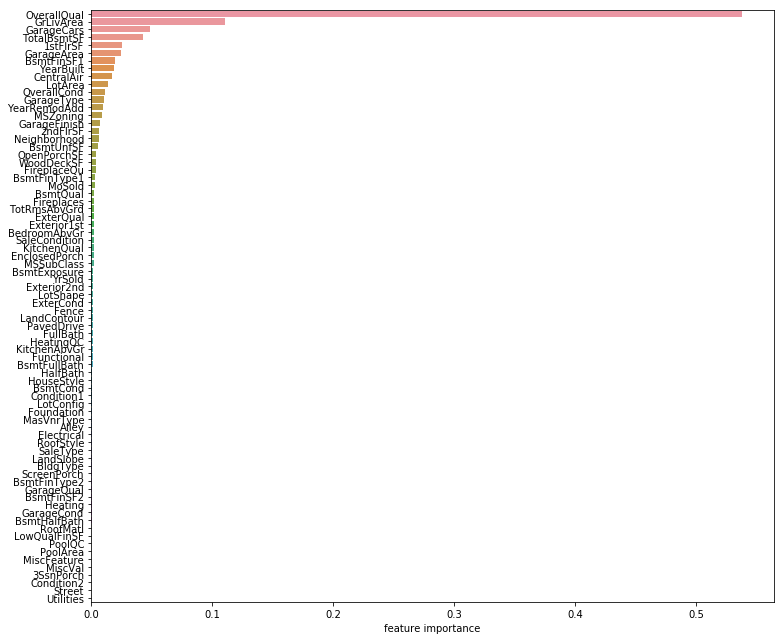

In [4]:
y_train = np.log(y_train)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11,9))
sns.barplot(x=rf.feature_importances_[ranking], y =X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()